## Week 12
Original Case Study
Sea Turtle Nesting Data

Step 1: Set up. Download packages and open data

In [1]:
import csv
from csv import DictReader
from csv import reader

import yellowbrick
import matplotlib.pyplot as plt
from yellowbrick.features import Rank2D
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

RSEED = 50



I need to upload my sea turtle data and create a dataframe.

In [4]:
addr1 = "turtle_data.csv"
data = pd.read_csv(addr1)

In [5]:
# Step 2:  check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (343, 9)


In [6]:
#Step 3:  Look at the data
print(data.head(5))

   Month Laid  Zone   Latitude  Longitude  GPS acc (m)  Green  Loggerhead  \
0           9    14  27.737867 -80.382993          5.0      1           0   
1           8    16  27.728565 -80.379646          5.0      1           0   
2           8    14  27.740557 -80.384169          5.0      0           1   
3           8    15  27.730658 -80.380230          5.0      1           0   
4           5    14  27.738560 -80.383278          5.0      0           1   

   Leatherback  Dist  
0            0   0.0  
1            0   0.0  
2            0   0.0  
3            0   0.0  
4            0   0.0  


#step 4: think of questions

I think it woild be interesrting to see if the other variables can categorized if the nest is a green nest or not.

In [22]:
#Step 5:  what type of variables are in the table 
print("Describe Data")
print(data.describe())
print("Summarized Data")
print(data.describe())

Describe Data
       Month Laid        Zone    Latitude   Longitude  GPS acc (m)  \
count  343.000000  343.000000  343.000000  343.000000   342.000000   
mean     6.288630   12.606414   27.745133  -80.387649     5.672515   
std      1.040729    2.871449    0.016898    0.007705     5.290760   
min      4.000000    9.000000   27.712008  -80.398843     5.000000   
25%      6.000000   10.000000   27.731633  -80.394341     5.000000   
50%      6.000000   11.000000   27.751114  -80.389404     5.000000   
75%      7.000000   15.000000   27.759124  -80.380475     5.000000   
max      9.000000   17.000000   27.767548  -80.374592   100.000000   

       Loggerhead  Leatherback        Dist  
count  343.000000   343.000000  342.000000  
mean     0.542274     0.017493    3.119883  
std      0.498938     0.131290    6.249947  
min      0.000000     0.000000    0.000000  
25%      0.000000     0.000000    0.000000  
50%      1.000000     0.000000    1.000000  
75%      1.000000     0.000000    2.0000

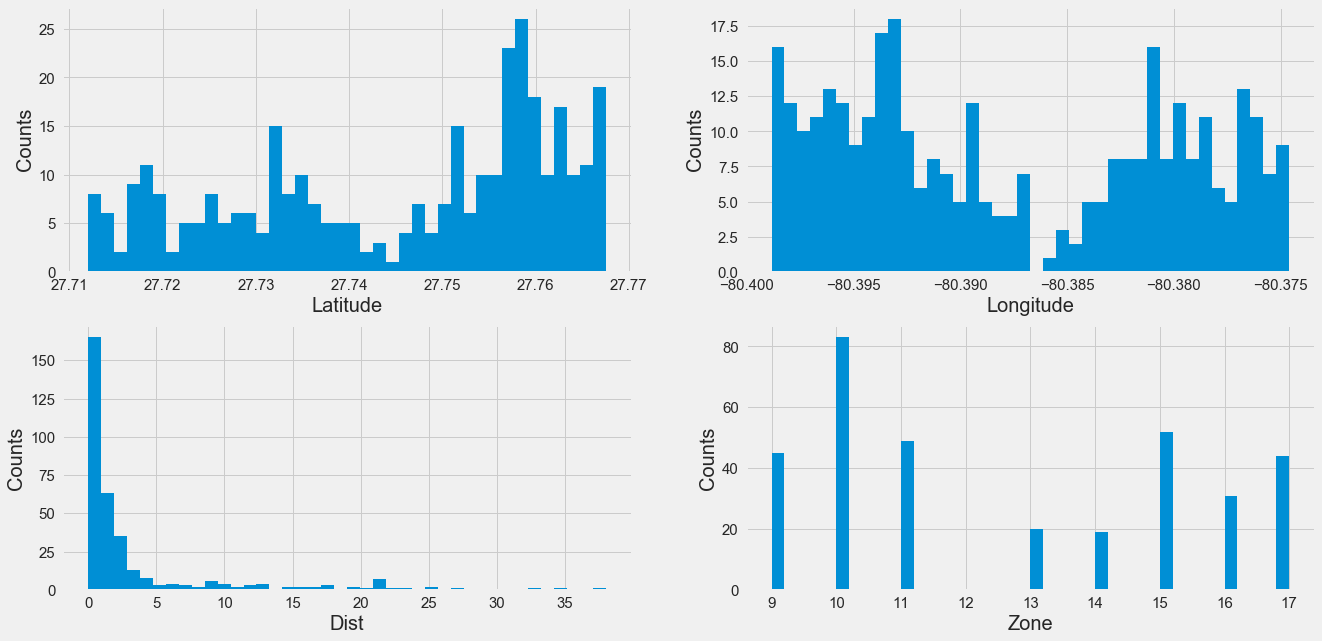

In [25]:
#Step 6: import visulization packages
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Latitude', 'Longitude', 'Dist', 'Zone']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

/Users/vivianhernandez/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


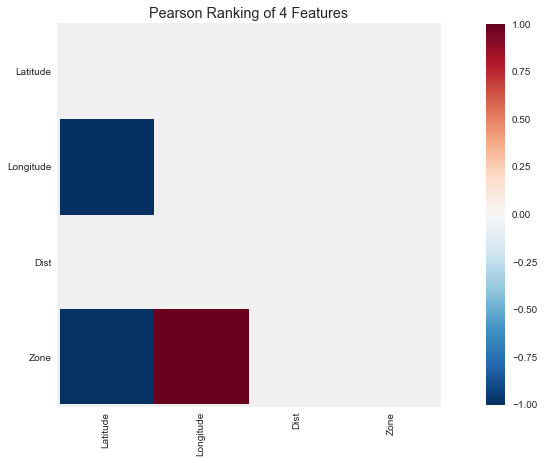

In [26]:
#Step 8: Pearson Ranking
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[num_features].as_matrix()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="turtpcoords1.png") # Draw/show/poof the data
plt.show()


In [13]:
# Step 9: separate into training and test subsets and prep for running a random forest model.
# Extract the labels
labels = np.array(data.pop('Green'))

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(data,
                                         labels, 
                                         stratify = labels,
                                         test_size = 0.3, 
                                         random_state = RSEED)

In [14]:
#Step 10: make the model
# Imputation of missing values
train = train.fillna(train.mean())
test = test.fillna(test.mean())

# Features for feature importances
features = list(train.columns)

# Create the model with 10 trees
model = RandomForestClassifier(n_estimators=10, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)


n_nodes = []
max_depths = []

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [15]:
#Step 11: analyze results.
#Stats about the trees in random forest
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

# Testing predictions (to determine performance)
rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

Average number of nodes 35
Average maximum depth 8


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [16]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt





In [17]:
# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

In [18]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, 
                                     [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, 
                                      [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

Recall Baseline: 1.0 Test: 1.0 Train: 1.0
Precision Baseline: 0.44 Test: 0.98 Train: 1.0
Roc Baseline: 0.5 Test: 1.0 Train: 1.0


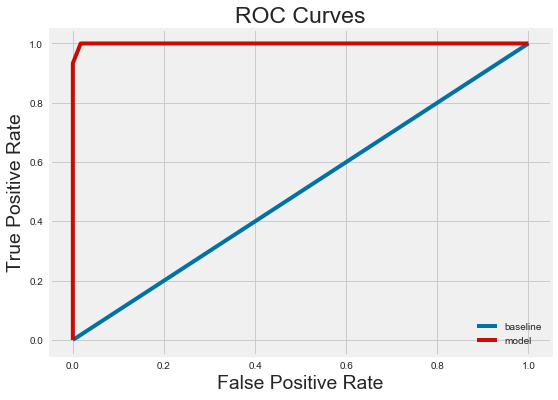

Confusion matrix, without normalization
[[57  1]
 [ 0 45]]


<Figure size 1080x504 with 0 Axes>

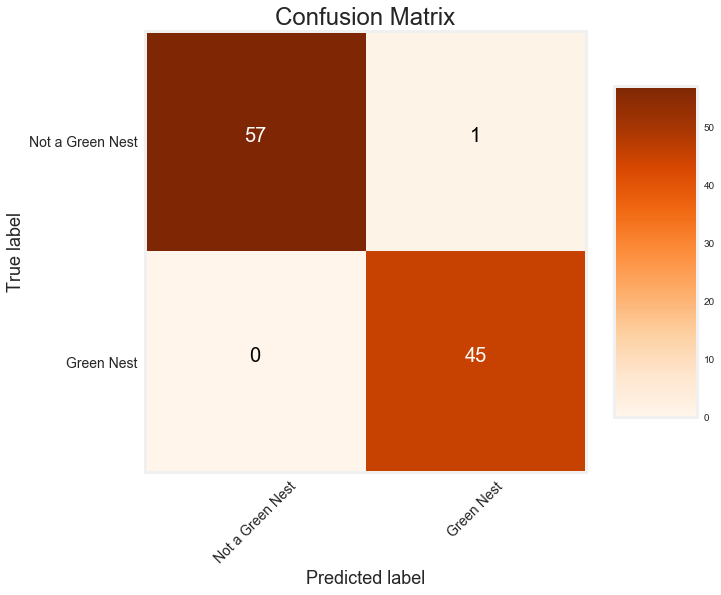

In [27]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
plt.savefig('roc_auc_curve.png')

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['Not a Green Nest', 'Green Nest'],
                      title = 'Confusion Matrix')

plt.savefig('cm.png')

Conclusion- the model did great at predicting the species. One 1 nest from the test subset was misclassified as represented by the confusion matrix above.